## 1. De epidemia a pandemia
<p><img style="float: left; margin:5px 20px 15px 1px; width:45%" src="../../images/coronavirus.jpg"></p>
<p>Em dezembro de 2019, o coronavírus COVID-19 foi identificado pela primeira vez na região de Wuhan, na China. Em 11 de março de 2020, a Organização Mundial da Saúde (OMS) classificou o surto de COVID-19 como uma pandemia. Muita coisa aconteceu nos meses entre grandes surtos no Irã, Coréia do Sul e Itália. </p>
<p>Sabemos que o COVID-19 se espalha por gotículas respiratórias, como tosse, espirro ou fala. Mas, com que rapidez o vírus se espalhou pelo mundo? E podemos ver algum efeito das políticas nacionais, como paralisações e quarentenas? </p>
<p>Felizmente, organizações em todo o mundo coletam dados para que os governos possam monitorar e aprender com essa pandemia. Notavelmente, o Centro de Ciência e Engenharia de Sistemas da Universidade Johns Hopkins criou um <a href="https://github.com/RamiKrispin/coronavirus">repositório de dados disponível publicamente</a> para consolidar esses dados de fontes como a OMS, os Centros de Controle e Prevenção de Doenças (CDC) e o Ministério da Saúde de vários países.</p>
<p>Neste notebook, você visualizará diferentes análises dos dados da COVID-19 desde as primeiras semanas do surto até 14 de outubro de 2022</p>
<p><em>Observe que informações e dados sobre a COVID-19 são atualizados com frequência. Os dados usados neste projeto foram extraídos em 14 de outubro de 2022 e não devem ser considerados os dados mais atualizados disponíveis.</em></p>

In [2]:
# Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler a tabela 
dataset = pd.read_csv("datasets/full-covid-data.csv", parse_dates=['date'])

# Ver o resultado
dataset.columns.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

### Vamos começar com o início da pandemia (22/01 até 22/03 de 2020)

In [3]:
confirmed_cases_all_2020 = dataset[["location", "date", "total_cases"]]
mask = confirmed_cases_all_2020["location"] == "World"
mask2 = confirmed_cases_all_2020["date"] < "2020-03-22"

confirmed_cases_world_2020 = confirmed_cases_all_2020[mask & mask2].reset_index().drop(columns="index")
confirmed_cases_world_2020.info()
confirmed_cases_world_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     60 non-null     object        
 1   date         60 non-null     datetime64[ns]
 2   total_cases  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ KB


,location,date,total_cases
0,World,2020-01-22,557.0
1,World,2020-01-23,657.0
2,World,2020-01-24,944.0
3,World,2020-01-25,1437.0
4,World,2020-01-26,2120.0


## 2. Casos confirmados em todo o mundo
<p>A tabela acima mostra os casos cumulativos confirmados de COVID-19 em todo o mundo de 22 de janeiro a 20 de março de 2020. Apenas ler os números em uma tabela torna difícil ter uma noção da escala e do crescimento do surto. Vamos desenhar um gráfico de linhas para visualizar os casos confirmados em todo o mundo.</p>

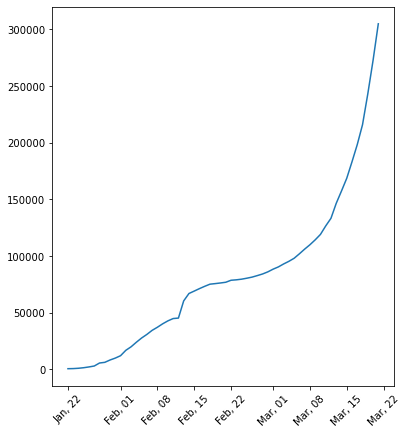

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (6,6))    
fig = sns.lineplot(data=confirmed_cases_world_2020, y="total_cases", x="date")
date_form = mdates.DateFormatter("%b, %d")
ax.xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
fig.set(ylabel=None, xlabel=None)
plt.xticks(rotation=45)
plt.show()

## 3. China em comparação com o resto do mundo
<p>O eixo y nesse gráfico é bastante assustador, com o número total de casos confirmados em todo o mundo ultrapassando 200.000 em 2 meses. Além disso, algumas coisas estranhas estão acontecendo: há um salto estranho em meados de fevereiro, então a taxa de novos casos diminui por um tempo, depois acelera novamente em março. Precisamos ir mais fundo para ver o que está acontecendo.</p>
<p>No início do surto, os casos de COVID-19 estavam concentrados principalmente na China. Vamos traçar casos confirmados de COVID-19 na China e no resto do mundo para entender melhor.</p>

C:\Users\brubi\AppData\Local\Temp\ipykernel_8160\2206880425.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  confirmed_cases_china = confirmed_cases_china[mask2].reset_index().drop(columns="index")


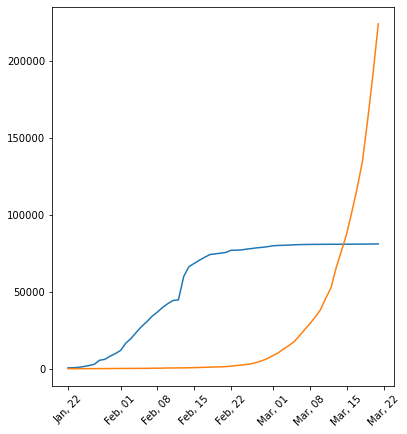

In [5]:
confirmed_cases_china = confirmed_cases_all_2020[confirmed_cases_all_2020["location"] == "China"]
confirmed_cases_china = confirmed_cases_china[mask2].reset_index().drop(columns="index")
confirmed_cases_world_2020["total_cases_no_china"] = confirmed_cases_world_2020["total_cases"].subtract(confirmed_cases_china["total_cases"])

fig, ax = plt.subplots(figsize = (6,6))
ax= sns.lineplot(x='date', y='total_cases', data=confirmed_cases_china)
ax1 = sns.lineplot(x='date', y='total_cases_no_china', data=confirmed_cases_world_2020)
date_form = mdates.DateFormatter("%b, %d")
ax.xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel=None, xlabel=None)
plt.xticks(rotation=45)
plt.show()

## 4. Vamos anotar!
<p>As duas linhas têm formas muito diferentes. Em fevereiro, a maioria dos casos ocorreu na China. Isso mudou em março, quando realmente se tornou um surto global: por volta de 14 de março, o número total de casos fora da China ultrapassou os casos dentro da China. Isso foi dias depois que a OMS declarou uma pandemia.</p>
<p>Houve alguns outros eventos marcantes que aconteceram durante o surto. Por exemplo, o grande salto na linha da China em 13 de fevereiro de 2020 não foi apenas um dia ruim em relação ao surto; A China mudou a maneira como relatou os números naquele dia (as tomografias foram aceitas como evidência para COVID-19, em vez de apenas testes de laboratório).</p>
<p>Ao anotar eventos como esse, podemos interpretar melhor as mudanças no gráfico.</p>

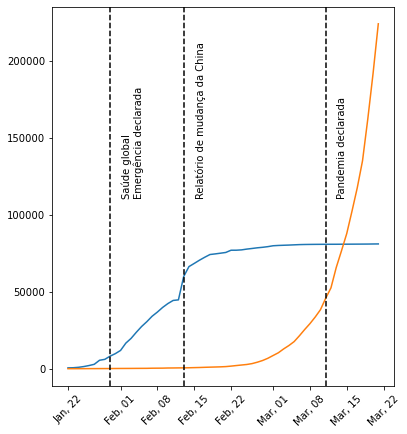

In [6]:
import datetime as dt

def vertical_line(time, label):
    plt.axvline(x = time, color="black", linestyle="--")
    plt.text(time,.5, label,  transform=ax.get_xaxis_transform(), rotation=90)

fig, ax = plt.subplots(figsize = (6,6))
ax= sns.lineplot(x='date', y='total_cases', data=confirmed_cases_china)
ax1 = sns.lineplot(x='date', y='total_cases_no_china', data=confirmed_cases_world_2020)
vertical_line(dt.datetime(2020,1,30), '\nSaúde global\nEmergência declarada')
vertical_line(dt.datetime(2020,3,11), '\nPandemia declarada')
vertical_line(dt.datetime(2020,2,13), '\nRelatório de mudança da China')
date_form = mdates.DateFormatter("%b, %d")
ax.xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel=None, xlabel=None)
plt.xticks(rotation=45)
plt.show()

## 5. Adicionando uma linha de tendência à China
<p>Ao tentar avaliar o tamanho dos problemas futuros, precisamos medir a rapidez com que o número de casos está crescendo. Um bom ponto de partida é ver se os casos estão crescendo mais rápido ou mais devagar do que linearmente.</p>
<p>Há um claro aumento de casos por volta de 13 de fevereiro de 2020, com a mudança de relatórios na China. No entanto, alguns dias depois, o crescimento de casos na China diminui. Como podemos descrever o crescimento do COVID-19 na China após 15 de fevereiro de 2020?</p>

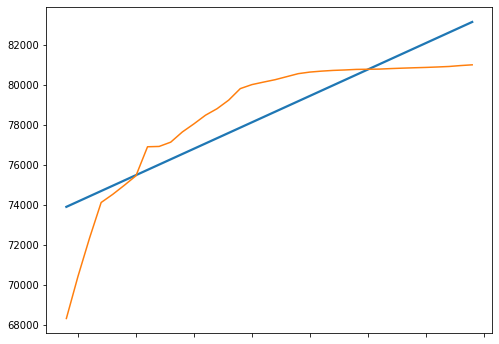

In [7]:
china_after_feb15 = confirmed_cases_china[confirmed_cases_china["date"] >= "2020-02-15"]

fig, ax = plt.subplots(figsize = (8,6))
fig = sns.regplot(x=china_after_feb15.index, y='total_cases', data=china_after_feb15, ci=None, scatter=False)
sns.lineplot(x=china_after_feb15.index, y="total_cases", data=china_after_feb15)
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel=None, xlabel=None, xticklabels=[])
plt.show()

## 6. E o resto do mundo?
<p>No gráfico acima, a taxa de crescimento na China é mais lenta do que linear. Essa é uma ótima notícia porque indica que a China conteve pelo menos um pouco o vírus no final de fevereiro e início de março.</p>
<p>Como o resto do mundo se compara ao crescimento linear?</p>

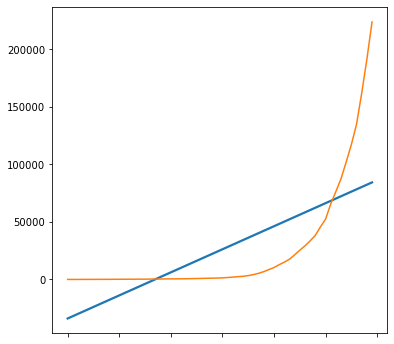

In [8]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x=confirmed_cases_world_2020.index, y='total_cases_no_china', data=confirmed_cases_world_2020
                 , ci=None, scatter=False)
sns.lineplot(x=confirmed_cases_world_2020.index, y="total_cases_no_china", data=confirmed_cases_world_2020)
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel=None, xlabel=None, xticklabels=[])
plt.show()

## 7. Adicionando uma escala logarítmica
<p>No gráfico acima, podemos ver que uma linha reta não se encaixa bem, e o resto do mundo está crescendo muito mais rápido do que linearmente. E se adicionarmos uma escala logarítmica ao eixo y?</p>

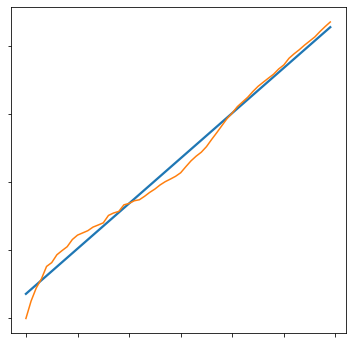

In [9]:
import numpy as np

fig, ax = plt.subplots(figsize = (6,6))
# confirmed_cases_world_2020["total_cases_no_china"] ** 10
# np.log10(confirmed_cases_world_2020["total_cases_no_china"])
ax = sns.regplot(x=confirmed_cases_world_2020.index, y=np.log10(confirmed_cases_world_2020["total_cases_no_china"]), data=confirmed_cases_world_2020
                 , ci=None, scatter=False)
sns.lineplot(x=confirmed_cases_world_2020.index, y=np.log10(confirmed_cases_world_2020["total_cases_no_china"]), data=confirmed_cases_world_2020)
plt.ticklabel_format(style='plain', axis='y')
ax.set(ylabel=None, xlabel=None, xticklabels=[], yticklabels=[])
plt.show()

## 8. Quais países fora da China foram os mais atingidos?
<p>Com a escala logarítmica, temos um ajuste muito mais próximo dos dados. Do ponto de vista da ciência de dados, um bom ajuste é uma ótima notícia. Infelizmente, do ponto de vista da saúde pública, isso significa que os casos de COVID-19 no resto do mundo estão crescendo a uma taxa exponencial, o que é uma notícia terrível.</p>
<p>Nem todos os países estão sendo afetados pelo COVID-19 igualmente, e seria útil saber em que parte do mundo os problemas são maiores. Vamos encontrar os países fora da China com mais casos confirmados em nosso conjunto de dados.</p>
<p><em>Obs: Estou restringindo os dados nos primeiros 2 meses do inicio da pandemia</em></p>

In [18]:
confirmed_cases_2020 = dataset[["continent", "location", "date", "total_cases"]]
confirmed_cases_2020 = confirmed_cases_2020.dropna(subset="continent").drop(columns="continent")
confirmed_cases_2020 = confirmed_cases_2020[confirmed_cases_2020["date"] <= "2020-03-20"]
confirmed_cases_top10 = confirmed_cases_2020.groupby("location").max().sort_values("total_cases", ascending=False).iloc[1:12]

In [19]:
confirmed_cases_top10 = confirmed_cases_top10.reset_index()
confirmed_cases_top10

,location,date,total_cases
0,Italy,2020-03-20,47021.0
1,Spain,2020-03-20,20410.0
2,United States,2020-03-20,20030.0
3,Iran,2020-03-20,19644.0
4,Germany,2020-03-20,13957.0
5,France,2020-03-20,12745.0
6,South Korea,2020-03-20,8652.0
7,United Kingdom,2020-03-20,7760.0
8,Switzerland,2020-03-20,5294.0
9,Netherlands,2020-03-20,3632.0


## 9. Traçar os países mais atingidos em meados de março de 2020
<p>Embora o surto tenha sido identificado pela primeira vez na China, há apenas um país do Leste Asiático (Coreia do Sul) na tabela acima. Quatro dos países listados (França, Alemanha, Itália e Espanha) estão na Europa e compartilham fronteiras. Para obter mais contexto, podemos traçar os casos confirmados desses países ao longo do tempo.</p>
<p>Se você quiser continuar fazendo visualizações ou encontrar os países mais atingidos a partir de hoje, você pode fazer suas próprias análises com os dados mais recentes disponíveis no <a href="https://github.com/RamiKrispin/coronavirus">Github (Rami Krispin)</ a> ou <a href="https://ourworldindata.org/coronavirus">Our World in Data</ a>. </p>

In [12]:
top_10_country = confirmed_cases_2020.loc[confirmed_cases_2020['location'].isin(["Italy", "Spain", "United States"
                                                                                 , "Iran", "Germany", "France", "South Korea"
                                                                                 , "United Kingdom", "Switzerland"])]

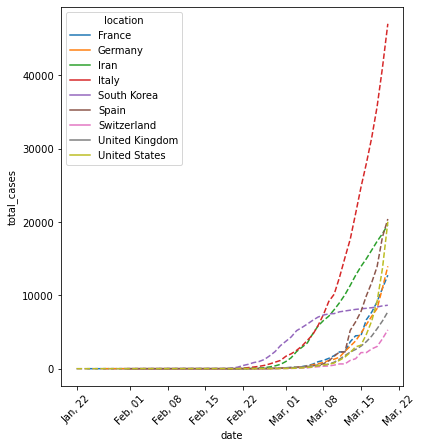

In [13]:
fig, ax = plt.subplots(figsize = (6,6))    
sns.lineplot(data=top_10_country, y="total_cases", x="date", hue="location", linestyle="--")
date_form = mdates.DateFormatter("%b, %d")
ax.xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
# fig.set(ylabel=None, xlabel=None)
plt.xticks(rotation=45)
plt.show()